In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = mnist.load_data()
(x_train, y_train), (x_test, y_test) = data

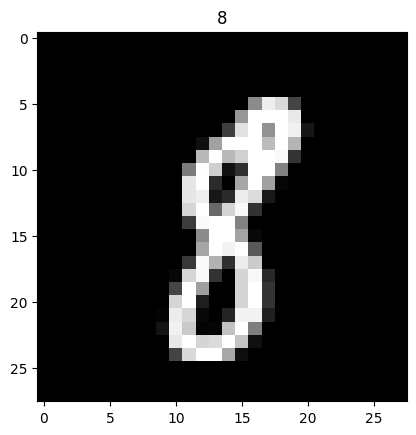

In [3]:
# x_train.shape
plt.imshow(x_train[300] , cmap = 'gray')
plt.title(y_train[300])
plt.show()

# create modle

In [4]:
# from keras.models import Sequential
from keras.layers import Dense,Flatten, Conv2D, AveragePooling2D
from keras.models import Sequential



In [5]:
model= Sequential()

In [6]:
model.add(Conv2D(filters= 4 ,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(filters= 4,kernel_size=(7,7),activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 4)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 4)           788       
                                                                 
 average_pooling2d_1 (Avera  (None, 3, 3, 4)           0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 36)                0         
                                                                 
 dense (Dense)               (None, 10)                3

In [9]:
model.fit(x_train, y_train, epochs=5, batch_size=1)

Epoch 1/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.3781 - accuracy: 0.8923
Epoch 2/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1976 - accuracy: 0.9437
Epoch 3/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1882 - accuracy: 0.9466
Epoch 4/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1873 - accuracy: 0.9467
Epoch 5/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1845 - accuracy: 0.9478


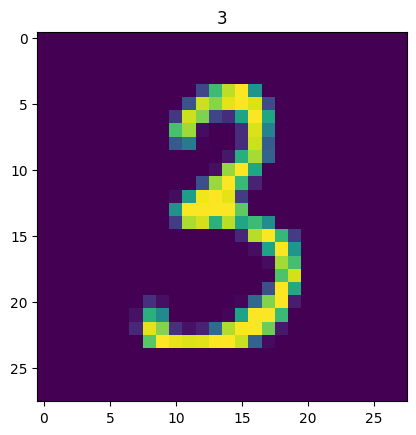

In [10]:
plt.imshow(x_test[76])
plt.title(y_test[76])
plt.show()

In [11]:
test=x_test[76].reshape(-1,28,28,1)

In [12]:
model.predict(test)

1/1 [==============================] - 0s 86ms/step


array([[2.5067304e-13, 3.6962192e-08, 4.7542112e-08, 9.5785964e-01,
        1.0345913e-08, 4.2135574e-02, 3.3274035e-16, 6.6704676e-12,
        4.5595580e-06, 1.1921817e-07]], dtype=float32)

In [13]:
# Use the model to make predictions
predictions = model.predict(test)

# The 'predictions' variable now contains the predicted probabilities for each class
# You can print the predicted probabilities or get the predicted class
predicted_class = np.argmax(predictions, axis=-1)

print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 17ms/step
Predicted Class: [3]


In [14]:
evaluation = model.evaluate(x_test, y_test)

# This will print the evaluation results, including loss and accuracy
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")


313/313 [==============================] - 1s 2ms/step - loss: 0.1484 - accuracy: 0.9547
Test Loss: 0.14839443564414978
Test Accuracy: 0.9546999931335449


In [15]:
model.save('model.h5')

c:\Users\siriw\anaconda3\envs\test1\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
